## HomeWork 1 Due at Mid-night 9/16/2019

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [204]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [205]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading MPG dataset ##

In [206]:
mpg = pd.read_csv("mpg2.csv")
print(mpg.shape)
mpg

(400, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,90.0,8,451.0,450.0,2555,8.0,2020,usa,tesla model Y


## Question 1. Check if there are any null or NA

In [207]:
#**Type in your code here**
mpg_nulls = mpg.isnull().sum().sum()
print('There are %s rows that are null' % mpg_nulls)

There are 7 rows that are null


## Question 2. Remove any rows that has null or NA

In [208]:
#**Type in your code here**
mpg.dropna(inplace=True)
print('After removing the null rows, there are now %s rows in the mpg dataframe' % len(mpg))

After removing the null rows, there are now 393 rows in the mpg dataframe


## Question 3. Check if there is any outliers in the mpg field

In [209]:
mean = np.average(mpg['mpg'])
min_mpg = np.min(mpg['mpg'])
max_mpg = np.max(mpg['mpg'])
outliers = 0
for i in mpg['mpg']:
    if(i>50):
        outliers = outliers + 1
if(outliers<=1):    
    print("There is %s outlier in this dataframe."  %outliers)
if(outliers>1):
    print("There are %s outliers in this dataframe."  %outliers)

There is 1 outlier in this dataframe.


## Question 4. Display and then Remove the one outlier row. You should now have 392 rows

In [210]:
print(mpg.shape)
mpg = mpg[mpg['mpg']<80]
print(mpg.shape)

(393, 9)
(392, 9)


## Question 5. Calculate the average acceleration cars made in usa using SQL

In [211]:
#**Type in your code here**
sql = "select avg(acceleration) 'Average Acceleration', origin 'Country' from mpg where origin = 'usa'"
df = ps.sqldf(sql)
df

,Average Acceleration,Country
0,14.990204,usa


## Question 6. Calculate the average horsepower for each country using SQL

In [212]:
sql2 = "select origin 'Country', avg(horsepower) 'Average Horsepower' from mpg group by origin"
df2 = ps.sqldf(sql2)
df2

,Country,Average Horsepower
0,europe,80.558824
1,japan,79.835443
2,usa,119.048980


## Question 7. Calculate the number of occurrences, mean, min, max of the weight for each country using SQL

In [213]:
sql3 = "select origin 'Country', count(weight) 'Total Weight', min(weight) 'Min Weight', max(weight) 'Max Weight', avg(weight) 'Average Weight' from mpg group by origin"
df3 = ps.sqldf(sql3)
df3

,Country,Total Weight,Min Weight,Max Weight,Average Weight
0,europe,68,1825,3820,2433.470588
1,japan,79,1613,2930,2221.227848
2,usa,245,1800,5140,3372.489796


## Question 8. Answer Question 7 but use Panada functions

In [214]:
mpgOccurrences = mpg['weight'].groupby(mpg['origin']).count();
mpgMins = mpg['weight'].groupby(mpg['origin']).min()
mpgMaxs = mpg['weight'].groupby(mpg['origin']).max()
mpgAvgs = mpg['weight'].groupby(mpg['origin']).mean()
pandasVersion = pd.DataFrame()
pandasVersion['Occurrences'] = mpgOccurrences
pandasVersion['Min Weights'] = mpgMins
pandasVersion['Max Weights'] = mpgMaxs
pandasVersion['Average Weights'] = mpgAvgs
pandasVersion

,Occurrences,Min Weights,Max Weights,Average Weights
origin,,,,
europe,68,1825,3820,2433.470588
japan,79,1613,2930,2221.227848
usa,245,1800,5140,3372.489796


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the horsepower, weight and accleartion for each country

In [215]:
mpgstd = mpg['horsepower'].groupby(mpg['origin']).std()
mpgskew = mpg['horsepower'].groupby(mpg['origin']).skew()
mpgkurt = mpg['horsepower'].groupby(mpg['origin']).apply(pd.DataFrame.kurtosis)
mpgstd_weight = mpg['weight'].groupby(mpg['origin']).std()
mpgskew_weight = mpg['weight'].groupby(mpg['origin']).skew()
mpgkurt_weight = mpg['weight'].groupby(mpg['origin']).apply(pd.DataFrame.kurtosis)
mpgstd_acc = mpg['acceleration'].groupby(mpg['origin']).std()
mpgskew_acc = mpg['acceleration'].groupby(mpg['origin']).skew()
mpgkurt_acc = mpg['acceleration'].groupby(mpg['origin']).apply(pd.DataFrame.kurtosis)
statisticsFrame = pd.DataFrame()
statisticsFrame['SD(hp.)'] = mpgstd
statisticsFrame['Skew(hp.)'] = mpgskew
statisticsFrame['Kurtosis(hp.)'] = mpgkurt
statisticsFrame['SD(wgt.)'] = mpgstd_weight
statisticsFrame['Skew(wgt.)'] = mpgskew_weight
statisticsFrame['Kurtosis(wgt.)'] = mpgkurt_weight
statisticsFrame['SD(acc.)'] = mpgstd_acc
statisticsFrame['Skew(acc.)'] = mpgskew_acc
statisticsFrame['Kurtosis(acc.)'] = mpgkurt_acc
statisticsFrame

,SD(hp.),Skew(hp.),Kurtosis(hp.),SD(wgt.),Skew(wgt.),Kurtosis(wgt.),SD(acc.),Skew(acc.),Kurtosis(acc.)
origin,,,,,,,,,
europe,20.157871,0.472850,-0.059514,491.813867,0.812081,-0.249813,3.087813,0.945656,0.036290
japan,17.819199,0.660375,-0.131696,320.497248,0.498497,-0.380625,1.954937,0.042795,-0.528450
usa,39.897790,0.763248,-0.189521,795.346690,0.067009,-0.965494,2.736020,0.098737,-0.142774


## Question 10. How would you describe the acceleration distribution for different country based on the Skew?

The skewness of each origin are all moderately and positively skewed.


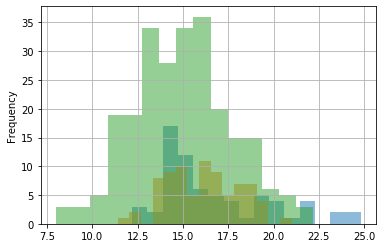

In [261]:
acc_skew = mpg['acceleration'].groupby(mpg['origin']).skew()
acc_df = pd.DataFrame()
acc_df['Acceleration Skew'] = acc_skew
print("The skewness of each origin are all moderately and positively skewed.")
acc_df
euro = mpg['acceleration'].groupby(mpg['origin']).plot.hist(alpha=0.5, bins=15, grid=True, legend=None)


## Question 11. How would you describe the acceleration distribution for different country based on Kurotsis?

In [217]:
kurt_desc = mpgkurt
print("The European, Japanese, and USA kurtosis values are really close to 0, so the distribution looks normal.")
kurt_desc

The European, Japanese, and USA kurtosis values are really close to 0, so the distribution looks normal.


origin
europe   -0.059514
japan    -0.131696
usa      -0.189521
Name: horsepower, dtype: float64

## Question 12. Plot the histogram of acceleration distribution for different country

### US Histogram

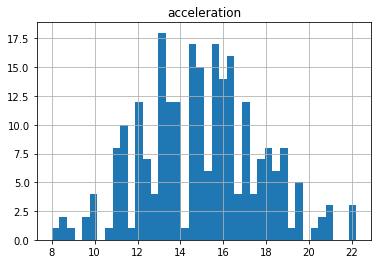

In [266]:
mpgstd_acc_usa = mpg.loc[(mpg['origin']=='usa')]
mpgstd_acc_usa[['acceleration','origin']].hist(bins = 40);

### Japan Histogram

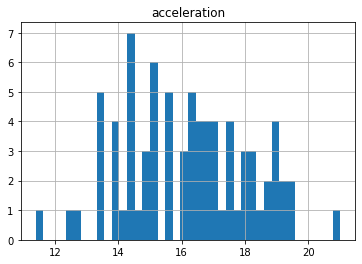

In [219]:
mpgstd_acc_jap = mpg.loc[(mpg['origin']=='japan')]
mpgstd_acc_jap[['acceleration','origin']].hist(bins = 40);

### Europe Histogram

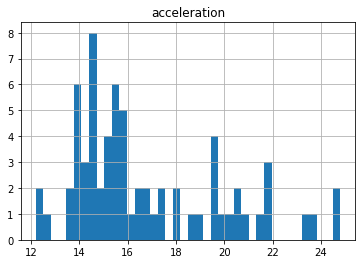

In [220]:
mpgstd_acc_euro = mpg.loc[(mpg['origin']=='europe')]
mpgstd_acc_euro[['acceleration','origin']].hist(bins = 40);

## Question 13. Calculate correlation of all the factors among themselves

###  Horsepower v. Mileage

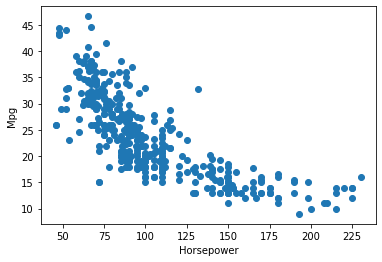

In [221]:
plt.scatter(mpg['horsepower'],mpg['mpg']);
plt.xlabel("Horsepower");
plt.ylabel("Mpg");

###  Cylinders v. Mileage

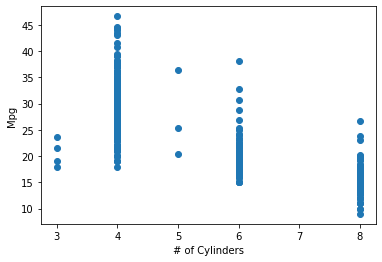

In [222]:
plt.scatter(mpg['cylinders'],mpg['mpg']);
plt.ylabel("Mpg");
plt.xlabel("# of Cylinders");

### Weight v. Mileage

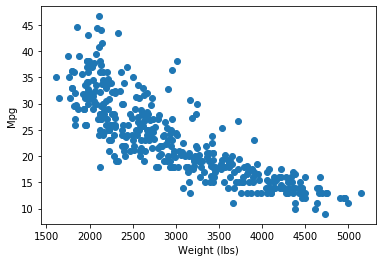

In [223]:
plt.scatter(mpg['weight'],mpg['mpg'],);
plt.xlabel("Weight (lbs)");
plt.ylabel("Mpg");

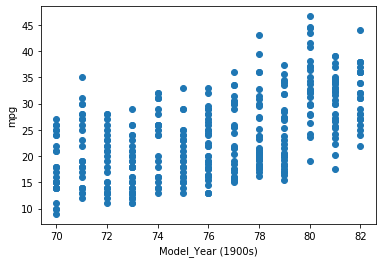

In [268]:
plt.scatter(mpg['model_year'],mpg['mpg'],);
plt.xlabel('Model_Year (1900s)');
plt.ylabel('mpg');

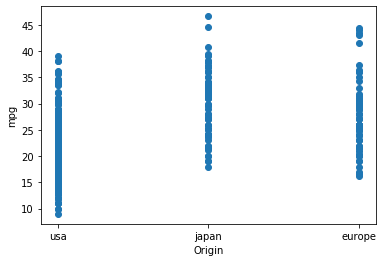

In [269]:
plt.scatter(mpg['origin'],mpg['mpg'],);
plt.xlabel('Origin');
plt.ylabel('mpg');

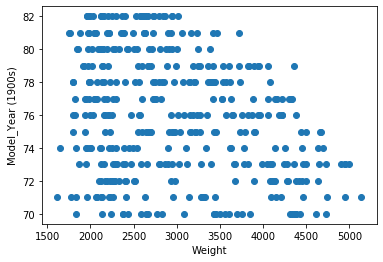

In [270]:
plt.scatter(mpg['weight'],mpg['model_year'],);
plt.ylabel('Model_Year (1900s)');
plt.xlabel('Weight');

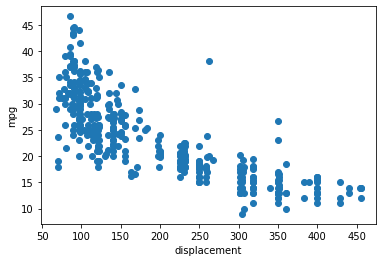

In [271]:
plt.scatter(mpg['displacement'],mpg['mpg'],);
plt.xlabel('displacement');
plt.ylabel('mpg');

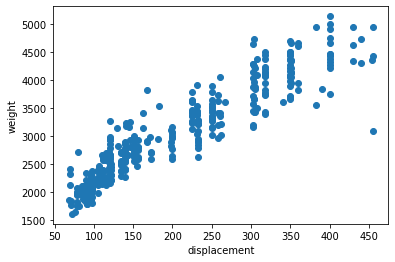

In [272]:
plt.scatter(mpg['displacement'],mpg['weight'],);
plt.xlabel('displacement');
plt.ylabel('weight');

### Origin v. mpg

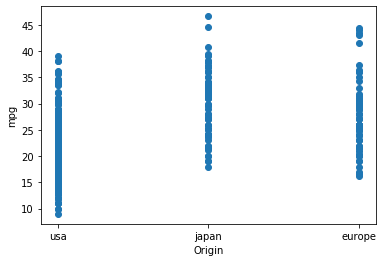

In [273]:
plt.scatter(mpg['origin'],mpg['mpg'],);
plt.xlabel('Origin');
plt.ylabel('mpg');

### USA cylinders v. mpg

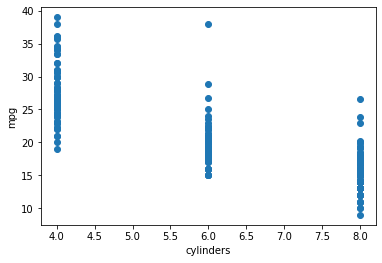

In [251]:
mpgstd_acc_usa = mpg.loc[(mpg['origin']=='usa')]
plt.scatter(mpgstd_acc_usa['cylinders'],mpgstd_acc_usa['mpg']);
plt.xlabel("cylinders");
plt.ylabel("mpg");

### Japan  cylinders v. mpg

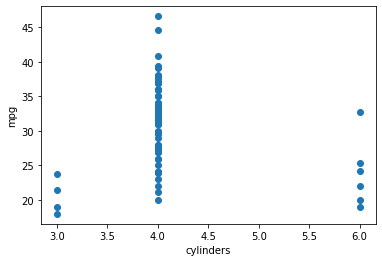

In [252]:
mpgstd_acc_jap = mpg.loc[(mpg['origin']=='japan')]
plt.scatter(mpgstd_acc_jap['cylinders'],mpgstd_acc_jap['mpg']);
plt.xlabel("cylinders");
plt.ylabel("mpg");

### Europe cylinders v. mpg

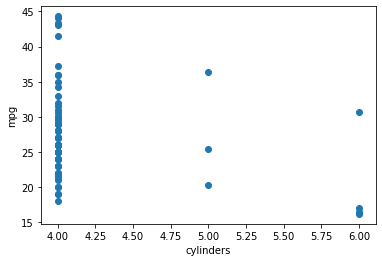

In [250]:
mpgstd_acc_euro = mpg.loc[(mpg['origin']=='europe')]
plt.scatter(mpgstd_acc_euro['cylinders'],mpgstd_acc_euro['mpg']);
plt.xlabel("cylinders");
plt.ylabel("mpg");

### USA horsepower v. mpg

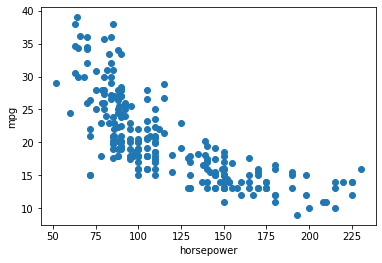

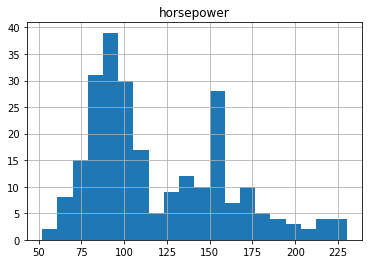

In [255]:
mpgstd_acc_usa = mpg.loc[(mpg['origin']=='usa')]
plt.scatter(mpgstd_acc_usa['horsepower'],mpgstd_acc_usa['mpg']);
plt.xlabel("horsepower");
plt.ylabel("mpg");
mpgstd_acc_usa.hist('horsepower',bins=20);

### Japan horsepower v. mpg

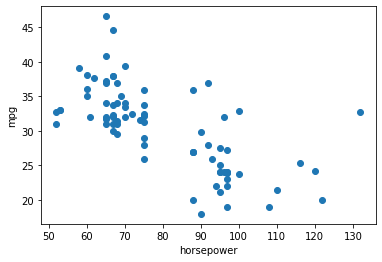

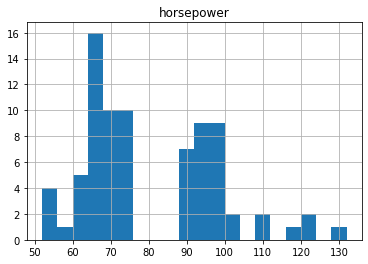

In [256]:
mpgstd_acc_jap = mpg.loc[(mpg['origin']=='japan')]
plt.scatter(mpgstd_acc_jap['horsepower'],mpgstd_acc_jap['mpg']);
plt.xlabel("horsepower");
plt.ylabel("mpg");
mpgstd_acc_jap.hist('horsepower', bins=20);

### Europe horsepower v. mpg

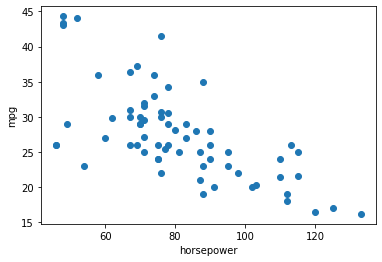

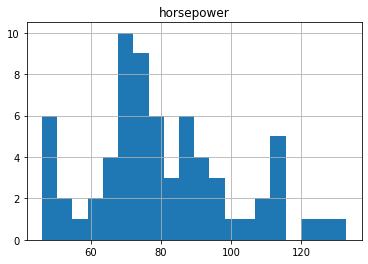

In [257]:
mpgstd_acc_euro = mpg.loc[(mpg['origin']=='europe')]
plt.scatter(mpgstd_acc_euro['horsepower'],mpgstd_acc_euro['mpg']);
plt.xlabel("horsepower");
plt.ylabel("mpg");
mpgstd_acc_euro.hist('horsepower', bins = 20);

### USA weight v. mpg

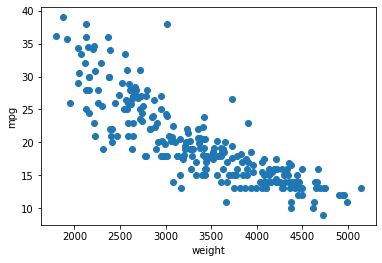

In [258]:
mpgstd_acc_usa = mpg.loc[(mpg['origin']=='usa')]
plt.scatter(mpgstd_acc_usa['weight'],mpgstd_acc_usa['mpg']);
plt.xlabel("weight (lbs)");
plt.ylabel("mpg");

### Japan weight v. mpg

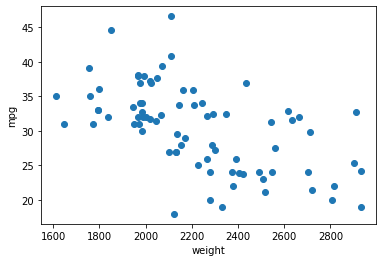

In [259]:
mpgstd_acc_jap = mpg.loc[(mpg['origin']=='japan')]
plt.scatter(mpgstd_acc_jap['weight'],mpgstd_acc_jap['mpg']);
plt.xlabel("weight (lbs)");
plt.ylabel("mpg");

### Europe weight v. mpg

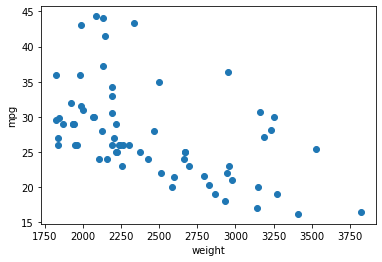

In [260]:
mpgstd_acc_euro = mpg.loc[(mpg['origin']=='europe')]
plt.scatter(mpgstd_acc_euro['weight'],mpgstd_acc_euro['mpg']);
plt.xlabel("weight (lbs)");
plt.ylabel("mpg");

## Question 14. Which factors (cylinders, horsepower or weight) will affect your mileage the most based on correlation?

Based on the graphs above, the grerater the horsepower, weight, and cylinders, the lower your mpg. 


## Question 15. Does the result depend on the country? If yes, how?

Overall, all countries have similar results with the relationships between the cylinder, horsepower, weight and their cars mpg.
- For cylinders v. mpg, Japan had lowest avg mpg for 3 cylinder vehicles and a smaller distribution. 
- For horsepower v. mpg, they all had a negative curvedlinear shape.
- For weight v. mpg, the USA had the strongest relationship where the heavier the car, the lower mpg. As for Japan, and Europe the relationships weren't as strong, but the lighter the car, the higher the mpg.